In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mines-vs-rocks/sonar.all-data.csv


### Notebook content
This notebook does not contain any preprocessing steps. <br>
This notebook has logistic regression from scratch. <br>
Steps to build a logistic regression model:
    1. Initialise parameters
    2. Compute Cost function and gradient
    3. Apply gradient descent to optimize the parameters
    4. Compute the final predictions

Tuning of Hyperparameters except lambda (regularisation constant)


In [2]:
#Reading the csv file into a dataframe
data = pd.read_csv('../input/mines-vs-rocks/sonar.all-data.csv', header=None)

In [3]:
# View the top five rows of the data
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
X = data.drop(60, axis=1)

In [5]:
print(X.shape)
X.head()

(208, 60)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [6]:
Y = data[60]
print(Y.head())
Y.replace({'R':0, 'M':1}, inplace=True)

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object


In [7]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
203    1
204    1
205    1
206    1
207    1
Name: 60, Length: 208, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_trn, X_tst, y_trn, y_tst = train_test_split(X, Y, test_size=0.2, random_state=0)

In [9]:
def sigmoid(x):
    '''
    Returns the sigmoid of x
    '''
    return 1/(1+np.exp(-x))

In [10]:
def init_param(X):
    '''
    Args: X -> input matrix
    Returns: a tuple of initialised parameters , w vector and b for the bias
    '''
    np.random.seed(0)
    w = np.random.rand(X.shape[1])
    b = 0
    param = {'w': w,
             'b': b
            }
    return param


In [11]:
def Cost_func(X, Y, param, lamb):
    '''
    Computes the cost and gradient value for a given X, Y, param
    Args:
        X => input feautre matrix 
        Y => output array
        param => parameters
        lamb => regularisation constant
    Returns: 
        J => Cost 
        grad => gradient values for w and b
    '''
    m = len(X)
    prob = np.dot(param['w'], X.T) + param['b']
    pred = sigmoid(prob)
    
    J = - np.sum((Y* np.log(pred)) + ((1-Y)*(np.log(1-pred))))/m
    reg = lamb*np.sum(np.power(param['w'], 2))/(2*m)
    J = J + reg
    
    dw = (1/m)* np.dot((pred - Y), X) + lamb*(param['w'])/m
    db = (1/m)* np.sum(pred -Y)
    
    grad= {'dw': dw,
           'db': db}
    
    return J, grad

In [12]:
def optimize(X, Y, param, num_iter, learning_rate, lamb):
    '''
    Optimize the paramenter using gradient descent.
    Args:
        X => input feature matrix
        Y => output array
        param => parameters which are updated
        num_iter => total number of itertions
        learning_rate => learning rate to specify the step size during gradient descent
    Returns:
        param => updated parameters' array
        cost => final cost        
    '''
    for i in range(num_iter):
        cost, grad = Cost_func(X, Y, param, lamb)
        param['w'] = param['w']-(learning_rate*grad['dw'])
        param['b'] = param['b']-(learning_rate*grad['db'])
        
        
    return param, cost

In [13]:
def predict(X, param):
    '''
    predicts the target value, Y_pred
    Args: X => input feature matrix,
          param => parameter vector (w, b)
    Returns: Array of predictions
    '''
    Y_pred=[]
    prob= np.dot(param['w'], X.T) + param['b']
    pred = sigmoid(prob)
    for i in range(len(X)):
        if pred[i] > 0.5:
            Y_pred.append(1)
        else:
            Y_pred.append(0)
            
    return np.array(Y_pred).T
        

In [14]:
def accuracy(Y, Y_pred):
    '''
    Returns the accuracy for the predictions
    '''
    return np.sum(Y == Y_pred) / len(Y)

In [15]:
def main(X, Y, learning_rate=0.01, num_iter=10000, lamb=0, ret_cost=False):
    '''
    Combining all the possible
    Args:
        ret_cost => Flag to return cost along with other values
    Returns: 
        if ret_cost == False
        param and y_pred
        
        else:
        param, y_pred and final cost
    '''
    param = init_param(X)
    cost, grad= Cost_func(X, Y, param, lamb)
    param, cost_f = optimize(X, Y, param, num_iter, learning_rate, lamb)
    
    y_pred = predict(X, param)
    acc = accuracy(Y, y_pred)
    
    print('Final_cost \t', cost_f)
    print('Accuracy_train \t', acc)
    if ret_cost:
        return param, y_pred, cost_f
    else:
        return param, y_pred

In [16]:
import matplotlib.pyplot as plt
cost=[]
num=[]
for i in range(2000, 20000, 2000):
    cost.append(main(X_trn, y_trn, learning_rate= 0.01, num_iter=i, lamb=1, ret_cost=True)[2])
    num.append(i)

Final_cost 	 0.5571198023157752
Accuracy_train 	 0.7590361445783133
Final_cost 	 0.5354779757512277
Accuracy_train 	 0.7891566265060241
Final_cost 	 0.5248217340526252
Accuracy_train 	 0.7951807228915663
Final_cost 	 0.518455096774429
Accuracy_train 	 0.8072289156626506
Final_cost 	 0.5143633704774635
Accuracy_train 	 0.8192771084337349
Final_cost 	 0.5116053068822033
Accuracy_train 	 0.8132530120481928
Final_cost 	 0.5096804502602928
Accuracy_train 	 0.8253012048192772
Final_cost 	 0.5083017225358886
Accuracy_train 	 0.8373493975903614
Final_cost 	 0.5072944935599797
Accuracy_train 	 0.8373493975903614


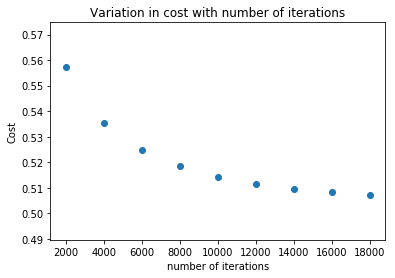

In [17]:
plt.title('Variation in cost with number of iterations')
plt.xlabel('number of iterations')
plt.ylabel('Cost')
plt.scatter(num, cost)

In [18]:
rate = [0.001, 0.003, 0.005, 0.009, 0.01, 0.03, 0.05, 0.09, 0.1, 0.3, 0.5]
cst=[]

In [19]:
for r in rate:
    print('Learning_rate: ', r)
    cst.append(main(X_trn, y_trn, learning_rate= r, num_iter=18000, lamb=1, ret_cost=True)[2])
    

Learning_rate:  0.001
Final_cost 	 0.5608337183251607
Accuracy_train 	 0.7469879518072289
Learning_rate:  0.003
Final_cost 	 0.5274225810347867
Accuracy_train 	 0.7891566265060241
Learning_rate:  0.005
Final_cost 	 0.5161977264062059
Accuracy_train 	 0.8072289156626506
Learning_rate:  0.009
Final_cost 	 0.5081864880130169
Accuracy_train 	 0.8373493975903614
Learning_rate:  0.01
Final_cost 	 0.5072944935599797
Accuracy_train 	 0.8373493975903614
Learning_rate:  0.03
Final_cost 	 0.504103121701829
Accuracy_train 	 0.8493975903614458
Learning_rate:  0.05
Final_cost 	 0.504028931440281
Accuracy_train 	 0.8493975903614458
Learning_rate:  0.09
Final_cost 	 0.5040212064690248
Accuracy_train 	 0.8493975903614458
Learning_rate:  0.1
Final_cost 	 0.5040211213485286
Accuracy_train 	 0.8493975903614458
Learning_rate:  0.3
Final_cost 	 0.5040210725317927
Accuracy_train 	 0.8493975903614458
Learning_rate:  0.5
Final_cost 	 0.5040210725317926
Accuracy_train 	 0.8493975903614458


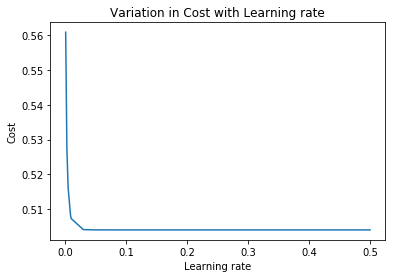

In [20]:
plt.title('Variation in Cost with Learning rate')
plt.xlabel('Learning rate')
plt.ylabel('Cost')
plt.plot(rate, cst)

In [21]:
lmd = [ 0.01, 0.1, 0.5, 1, 10, 20, 50, 100]
cost_l = []

In [22]:
for l in lmd:
    print('Regularisation Constatnt: ', l)
    trn_val = main(X_trn, y_trn, learning_rate= 0.5, num_iter=18000, lamb=l, ret_cost=True)
    cost_l.append(trn_val[2])
    p = trn_val[0]
    pred=  predict(X_tst, p)
    print('Test Cost : \t', accuracy(y_tst, pred) )

Regularisation Constatnt:  0.01
Final_cost 	 0.30317829090926895
Accuracy_train 	 0.8795180722891566
Test Cost : 	 0.8333333333333334
Regularisation Constatnt:  0.1
Final_cost 	 0.39146463553041627
Accuracy_train 	 0.8795180722891566
Test Cost : 	 0.8333333333333334
Regularisation Constatnt:  0.5
Final_cost 	 0.46682445773157244
Accuracy_train 	 0.8493975903614458
Test Cost : 	 0.8571428571428571
Regularisation Constatnt:  1
Final_cost 	 0.5040210725317926
Accuracy_train 	 0.8493975903614458
Test Cost : 	 0.8333333333333334
Regularisation Constatnt:  10
Final_cost 	 0.6256885961093586
Accuracy_train 	 0.7228915662650602
Test Cost : 	 0.6904761904761905
Regularisation Constatnt:  20
Final_cost 	 0.6500725138150747
Accuracy_train 	 0.6987951807228916
Test Cost : 	 0.6428571428571429
Regularisation Constatnt:  50
Final_cost 	 0.670594064964691
Accuracy_train 	 0.6626506024096386
Test Cost : 	 0.6190476190476191
Regularisation Constatnt:  100
Final_cost 	 0.6792917406149301
Accuracy_train 

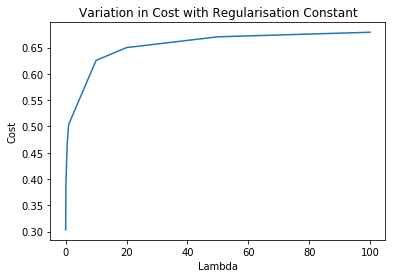

In [23]:
plt.title('Variation in Cost with Regularisation Constant')
plt.xlabel('Lambda')
plt.ylabel('Cost')
plt.plot(lmd, cost_l)

In [24]:
param_f = main(X_trn, y_trn, learning_rate= 0.5, num_iter=18000, lamb=0.5)[0]

Final_cost 	 0.46682445773157244
Accuracy_train 	 0.8493975903614458


In [25]:
pred= predict(X_tst, param_f)

In [26]:
accuracy(y_tst, pred)

0.8571428571428571